## Pricing European, American and Bermudan Style Options using Finite} Difference Methods
#### Numerical Analysis Fall 2022 Final Project
Authors: Ren Yang, Yinan Chen, Julian Moreno and Chris Buren

# **Introduction**

In this project, we provide the python implmentation of two finite difference method(Implicit and Crank-Nicolson Method) to solve the PDEs of 3 styles of options(European, American, and Bermuda with path dependent payoff). We present and compare the accuracy of solutions and the efficiency of excuting the algorithms.

### **Types of Options**

Under the Black-Scholes-Merton framework, the stock price without dividend yield is modeled by a exponential martingale following SDE:

> $dS_t=𝑢S_tdt+σS_tdW_t$

Under risk neutral measure $Q$, This exponential martinagle can be represented as
> $dS_t=rS_tdt+σS_tdW_t$

An typical vanilla call option has the pay-off function $Max(S_T-K,0)$ at maturity. While a typical put option has the pay-off function $Max(K-S_T,0)$. In this projects, we only deal with options with the above form of pay-off function, but with different conditions on when can the option be excercised. 

One can show that, under non-arbitrage condition, a delta hedged portoflio consists of $∂C/∂S$ shares of underlying stock and 1 european style option $C$ can be formed in a self-financing way. Then, the following holds true for this delta hedged portfolio.
> $r(C-\frac{∂C}{∂S} S_t)dt = (\frac{∂C}{∂t}+\frac{1}{2}\frac{∂^2C}{∂^2S}S_tσ^2)dt$

Re-arrange the terms we obtain the Black-Schole PDE for european option with non-dividend paying underlying,

> $\frac{∂C}{∂t}+ rS_t\frac{∂C}{∂t}+\frac{1}{2}\frac{∂^2C}{∂^2S}S_tσ^2=rC$


In the case of the American options, it has the same pay-off function as its european syle counterpart. However, unlike the european options, which can be only be excercised at the agreed maturity date, the holder of american option can excercise it at any time during the contract period, as long as she feels beneficial to do so. 

Then, we can show that the American option has the following dynamics,

> $ min(-\frac{∂C}{∂t}-rS_t\frac{∂C}{∂t}-\frac{1}{2}\frac{∂^2C}{∂^2S}S_tσ^2-rC, C-w(S-K))=0$

A Bermuda option is smilar to american option in the way that they both allow excercise before the contract maturity. The difference is that bermuda option can only be excercised at a fixed set of date before maturity. 



### **Pricing by solving the PDEs**

Now with the PDEs describing the dynamics of the options, the problem of option pricing now becomes solving the PDEs numerically given a set of boundaries(typically involves the terminal pay-offs at maturity). For this project we employs the finite difference method. The main idea behind the finite difference method is to discretize the continues evolution of the option value on a grid consists of discrete points. By specifying the proper boundaries of the grid one can iteratively compute the values at any points on the grid. There are 3 following ways in which such method can be implemented.

### **The Implicit Method** 
Under this method, the components of the Black-Schole PDE can be approximated as follows
> *Forward Approximation* of $\frac{∂C}{∂t}$ as $\frac{C_{t+1,j}-C_{t,j}}{δt}$

> *Central Approximation* of $\frac{∂C}{∂S}$ as $\frac{C_{t,j+1}-C_{t,j-1}}{2δS}$

> *Standard Approximation* of $\frac{∂^2C}{∂^2S}$ as $\frac{C_{t,j+1}+C_{t,j-1}-2C_{t,j}}{(δS)^2}$

Plug in the above terms to the Black_Schole PDE, then for each time step we can obtain the following matrix formuation,

> $BC_t=C_{t+1}+K_t$

We solve the above equation using LU decompsition at each time step. 


### **The Crank-Nicolson Method** 
Under this method, the components of the Black-Schole PDE can be approximated as follows
> *Central Approximation* of $\frac{∂C_{t-(1/2),j}}{∂t}$ as $\frac{C_{t,j}-C_{t-1,j}}{δt}$

> *Central Approximation* of $\frac{∂C_{t-(1/2),j}}{∂S}$ as $\frac{1}{2}(\frac{C_{t-1,j+1}-C_{t-1,j-1}}{2δS}+\frac{C_{t,j+1}-C_{t,j-1}}{2δS})$

> *Standard Approximation* of $\frac{∂^2C}{∂^2S}$ as $\frac{1}{2}(\frac{C_{t-1,j+1}-2C_{t-1,j}+C_{t-1,j-1}}{δS^2}+\frac{C_{t,j+1}-2*C_{t,j}+C_{t,j-1}}{δS^2})$

Plug in the above terms to the Black_Schole PDE, then for each time step we can obtain the following matrix formuation,

> $AC_{t}=DC_{t+1}+K_{t-1}+K_{t}$

We solve the above equation using LU decompsition at each time step. 




###**Stability and Rate of Convergence**

One concern about finite difference method is that some incorrectly chosen parameters(in this case, $σ,r,δt$) might cause the algorithm to be unstable(i.e fail to converge to a finite solution). The main source of this problem lies at the coefficient matrix ( A, D and B). For implicit method, it is stable if the infinite norm of $B^{-1} <=1$; for Crank Nicolson method, it is stable if the infinite norm of $C^{-1}D <=1$. Luckily, these conditions are true for any $σ,r,δt$ used for the above methods. However, for other methods like the explicit method, stability is not guaranteed. This is why in this project we mainly focus on the above two methods. 

Furthermore, one can show theoretically that Crank Nicolson Method has the fastest rate of convergence. In this project we will verify this statement.


###**Algorithm**
We implement the following algorithm to interatively solving for the value of european option. The general form is
```
# implicit method, European Call
for 1:T 
   A*C_t=C_t+1 
```

Considering the early excercise feature of the American and Bermudan option,we compare the intrinsic value of the option against the pay-off of early-excercise to determine the value at that time step. Thus, the modified algorithm takes the general form


```
# implicit method, American Call
for 1:T:
   A*C_t=C_t+1
   for 1:K:
    if C_tk<max(S_k-K): 
      C_tk=S_k-K
  
```
```
# implicit method, Bermudan Call
for 1:T:
   A*C_t=C_t+1
   if t in agreed_excercise_date:
    for 1:K:
      if C_tk<max(S_k-K): 
        C_tk=S_k-K
  
```

In [ ]:
import numpy as np
import math 
from scipy import linalg
from scipy import interpolate
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import time

## The Implicit Method

In [ ]:
def BSM_Pricing_Implicit_Method(K,R,T,sig,OPType,exotics,stock_price_list,time_list,early_excercise_date,s0):


  max_stock_index=len(stock_price_list)-1
  max_time_index=len(time_list)-1

  r=R

  # Initilize empty pricing grid
  option_price_grid=np.empty([max_stock_index+1, max_time_index+1])


  dt=time_list[1]-time_list[0]
  dj=1


#------------------append boundary conditions to the pricing grid------------------------


    

  # Alternatively, we can use this second derivative boundary on the pricing grid to force the option prices 
  #to be verticle or horizontal when stock price approach inf big or inf small
  # #########################
  # # second derivative boundary condition
  # Grid[0,0]=B[0,0]+2*a_list[0]
  # Grid[0,1]=B[0,1]-a_list[0]
  # Grid[-1,-1]=B[-1,-1]+2*c_list[-1]
  # Grid[-1,-2]=B[-1,-2]-c_list[-1]
  # #########################



  if OPType=='Call':
    def call_payoff(S):
      return max(S-K,0)
    def call_upper_bound(T):
      return (max(stock_price_list)-K)*math.exp(-r*T) # can swaped by second derivative boundary 

    option_price_grid[:,-1]=np.array(list(map(call_payoff, stock_price_list))) # call value at maturity(Pay-Off) (time dimension boundary condition)
    option_price_grid[-1,:]=np.array(list(map(call_upper_bound,time_list[::-1]))) # call value upper bound (stock price dimension boundary condition)
 
  

  else:
    def put_payoff(S):
      return max(K-S,0)
    def put_upper_bound(T):
      return (K-min(stock_price_list))*math.exp(-r*T) # can swaped by second derivative boundary 
    
    option_price_grid[:,-1]=np.array(list(map(put_payoff, stock_price_list)))  # put value at maturity (Pay-Off) (time dimension boundary condition)
    option_price_grid[0,:]=np.array(list(map(put_upper_bound,time_list[::-1]))) # put value upper bound (stock price dimension boundary condition)


#------------------------------ iteratively solve for Ft from eqaution F_t*B=F_t+1+Vect------------------------------------------



# Initialize the coefficient metrics B

# For implicit Method stability is not a concern. Algo always converge as infinite norm of B_inverse is <1




  def a_star(j):
    return 0.5*dt*(r*j-math.pow(sig,2)*math.pow(j,2))
  def b_star(j):
    return 1+dt*(math.pow(sig,2)*math.pow(j,2)+r)
  def c_star(j):
    return 0.5*dt*(-r*j-math.pow(sig,2)*math.pow(j,2))

  a_list=[a_star(i) for i in range(2,max_stock_index)]
  b_list=[b_star(i) for i in range(1,max_stock_index)]
  c_list=[c_star(i) for i in range(1,max_stock_index-1)]


  B=np.diag(a_list,-1)+np.diag(b_list,0)+np.diag(c_list,1) # constuct Tri-Diagonal Matrix of B
  
  

  
  
  
  P, L, U = linalg.lu(B)

#---------------------------------------switch for different option types--------------------------------------------------------
  if exotics=='Bermudan':
    for step in range(max_time_index-1,-1,-1):
      
      vect=np.array([0 for i in range(len(B))])
      vect[0]=a_list[1]*option_price_grid[0,step]
      vect[-1]=c_list[-1]*option_price_grid[-1,step]

      euro_style_value=np.matmul(linalg.inv(U),np.matmul(linalg.inv(L),(option_price_grid[1:-1,step+1]-vect)))

      if time_list[step] in early_excercise_date:
        #print(f'excercised at {time_list[step]}')
        if OPType=='Call':
          for i in range(1,max_stock_index):
            excercise_val=call_payoff(stock_price_list[i])
            #if excercise_val>euro_style_value[i-1]:
              #print(f'excercised at {stock_price_list[i]}')
            option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])
        else: 
          for i in range(1,max_stock_index):
            excercise_val=put_payoff(stock_price_list[i])
            #if excercise_val>euro_style_value[i-1]:
              #print(f'excercised at {stock_price_list[i]}')
            option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])
      else:
        option_price_grid[1:-1,step]=euro_style_value
      
  
  elif exotics=='American':
    for step in range(max_time_index-1,-1,-1):
      vect=np.array([0 for i in range(len(B))])
      vect[0]=a_list[1]*option_price_grid[0,step]
      vect[-1]=c_list[-1]*option_price_grid[-1,step]
  
      euro_style_value=np.matmul(linalg.inv(U),np.matmul(linalg.inv(L),(option_price_grid[1:-1,step+1]-vect)))
    
      if OPType=='Call':
        for i in range(1,max_stock_index):
          excercise_val=call_payoff(stock_price_list[i])
          # if excercise_val>euro_style_value[i-1]:
          #   print(f'excercised at {stock_price_list[i]}')
          option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])
    
      else: 
        for i in range(1,max_stock_index):
          excercise_val=put_payoff(stock_price_list[i])
          # if excercise_val>euro_style_value[i-1]:
          #   print(f'excercised at {stock_price_list[i]}')
          option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])

  
  
  else: # Option Type: European
    for step in range(max_time_index-1,-1,-1):
      vect=np.array([0 for i in range(len(B))])
      vect[0]=a_list[1]*option_price_grid[0,step]
      vect[-1]=c_list[-1]*option_price_grid[-1,step]
      
      option_price_grid[1:-1,step]=np.matmul(linalg.inv(U),np.matmul(linalg.inv(L),(option_price_grid[1:-1,step+1]-vect)))

#-------------------------------------interpolate the pricing grid on t=0 to price the option----------------------------------
    
  
  def interpolatingPoly(X,Y,x_new):
    
    
      def LagrangePoly(k,x):
          nonlocal X
          res=1
          for i in range (len(X)):
              if i==k:
                  continue
              else:
                  coef=(x-X[i])/(X[k]-X[i])
                  res=res*coef
          return res
    
    
      res=0
      for k in range(len(X)):
          res+=LagrangePoly(k,x_new)*Y[k]
      return res


  #print(option_price_grid[:,0][90])
  #df=pd.DataFrame(option_price_grid)

  #print(df)

  return interpolatingPoly(stock_price_list, option_price_grid[:,0],s0)
  #return df





### The Crank-Nicolson Method

In [ ]:
def BSM_Pricing_Crank_Nicolson_Method(K,R,T,sig,OPType,exotics,stock_price_list,time_list,early_excercise_date,s0):


  

  max_stock_index=len(stock_price_list)-1
  max_time_index=len(time_list)-1

  r=R

  # Initilize empty pricing grid
  option_price_grid=np.empty([max_stock_index+1, max_time_index+1])


  dt=time_list[1]-time_list[0]
  dj=1


#------------------append boundary conditions to the pricing grid------------------------

  # Alternatively, we can use this second derivative boundary on the pricing grid to force the option prices 
  #to be verticle or horizontal when stock price approach inf big or inf small
  # #########################
  # # second derivative boundary condition
  # Grid[0,0]=B[0,0]+2*a_list[0]
  # Grid[0,1]=B[0,1]-a_list[0]
  # Grid[-1,-1]=B[-1,-1]+2*c_list[-1]
  # Grid[-1,-2]=B[-1,-2]-c_list[-1]
  # #########################
  
  
  
  if OPType=='Call':
    def call_payoff(S):
      return max(S-K,0)
    def call_upper_bound(T):
      return (max(stock_price_list)-K)*math.exp(-r*T)

    option_price_grid[:,-1]=np.array(list(map(call_payoff, stock_price_list))) # call value at maturity(Pay-Off) (time dimension boundary condition)
    option_price_grid[-1,:]=np.array(list(map(call_upper_bound,time_list[::-1]))) # call value upper bound (stock price dimension boundary condition)
 
  

  else:
    def put_payoff(S):
      return max(K-S,0)
    def put_upper_bound(T):
      return (K-min(stock_price_list))*math.exp(-r*T)
    
    option_price_grid[:,-1]=np.array(list(map(put_payoff, stock_price_list)))  # put value at maturity (Pay-Off) (time dimension boundary condition)
    option_price_grid[0,:]=np.array(list(map(put_upper_bound,time_list[::-1]))) # put value upper bound (stock price dimension boundary condition)


#------------------------------ iteratively solve for Ft from eqaution C*F_t=D*F_t+1+Vect_1+Vect_2------------------------------------------



# Initialize the coefficient metrics inv(C)D

# For Crank Nicoleson Method stability is not a concern. Algo always converge as infinite norm of inv(C)D is <1




  def a_star(j):
    return 0.25*dt*(math.pow(sig,2)*math.pow(j,2)-r*j)
  def b_star(j):
    return -0.5*dt*(math.pow(sig,2)*math.pow(j,2)+r)
  def c_star(j):
    return 0.25*dt*(math.pow(sig,2)*math.pow(j,2)+r*j)



  C_a=[-a_star(i) for i in range(2,max_stock_index)]
  C_b=[1-b_star(i) for i in range(1,max_stock_index)]
  C_c=[-c_star(i) for i in range(1,max_stock_index-1)]

  C=np.diag(C_a,-1)+np.diag(C_b,0)+np.diag(C_c,1)
  
  
  D_a=[a_star(i) for i in range(2,max_stock_index)]
  D_b=[1+b_star(i) for i in range(1,max_stock_index)]
  D_c=[c_star(i) for i in range(1,max_stock_index-1)]

  D=np.diag(D_a,-1)+np.diag(D_b,0)+np.diag(D_c,1)

 


  

  P, L, U = linalg.lu(C)



  if exotics=='Bermudan':
     for step in range(max_time_index-1,-1,-1):
      vect_1=np.array([0 for i in range(len(C))])
      vect_1[0]=a_star(1)*option_price_grid[0,step+1]
      vect_1[-1]=c_star(max_stock_index-1)*option_price_grid[-1,step+1]
      
      vect_2=np.array([0 for i in range(len(C))])
      vect_2[0]=a_star(1)*option_price_grid[0,step]
      vect_2[-1]=c_star(max_stock_index-1)*option_price_grid[-1,step]
      RHS=np.matmul(D,option_price_grid[1:-1,step+1])+vect_1+vect_2
      euro_style_value=np.matmul(linalg.inv(U),np.matmul(linalg.inv(L),RHS))


      if time_list[step] in early_excercise_date:
        #print(f'excercised at {time_list[step]}')
        if OPType=='Call':
          for i in range(1,max_stock_index):
            excercise_val=call_payoff(stock_price_list[i])
            #if excercise_val>euro_style_value[i-1]:
              #print(f'excercised at {stock_price_list[i]}')
            option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])
        else: 
          for i in range(1,max_stock_index):
            excercise_val=put_payoff(stock_price_list[i])
            #if excercise_val>euro_style_value[i-1]:
              #print(f'excercised at {stock_price_list[i]}')
            option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])
      else:
        option_price_grid[1:-1,step]=euro_style_value
  
  
  elif exotics=='American':
     for step in range(max_time_index-1,-1,-1):
      vect_1=np.array([0 for i in range(len(C))])
      vect_1[0]=a_star(1)*option_price_grid[0,step+1]
      vect_1[-1]=c_star(max_stock_index-1)*option_price_grid[-1,step+1]
      
      vect_2=np.array([0 for i in range(len(C))])
      vect_2[0]=a_star(1)*option_price_grid[0,step]
      vect_2[-1]=c_star(max_stock_index-1)*option_price_grid[-1,step]
      RHS=np.matmul(D,option_price_grid[1:-1,step+1])+vect_1+vect_2
      euro_style_value=np.matmul(linalg.inv(U),np.matmul(linalg.inv(L),RHS))



      if OPType=='Call':
        for i in range(1,max_stock_index):
          excercise_val=call_payoff(stock_price_list[i])
          # if excercise_val>euro_style_value[i-1]:
          #   print(f'excercised at {stock_price_list[i]}')
          option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])
    
      else: 
        for i in range(1,max_stock_index):
          excercise_val=put_payoff(stock_price_list[i])
          # if excercise_val>euro_style_value[i-1]:
          #   print(f'excercised at {stock_price_list[i]}')
          option_price_grid[i,step]=max(excercise_val,euro_style_value[i-1])
  
  
  else: #European


    for step in range(max_time_index-1,-1,-1):
      vect_1=np.array([0 for i in range(len(C))])
      vect_1[0]=a_star(1)*option_price_grid[0,step+1]
      vect_1[-1]=c_star(max_stock_index-1)*option_price_grid[-1,step+1]
      
      vect_2=np.array([0 for i in range(len(C))])
      vect_2[0]=a_star(1)*option_price_grid[0,step]
      vect_2[-1]=c_star(max_stock_index-1)*option_price_grid[-1,step]
      RHS=np.matmul(D,option_price_grid[1:-1,step+1])+vect_1+vect_2
      option_price_grid[1:-1,step]=np.matmul(linalg.inv(U),np.matmul(linalg.inv(L),RHS))




#-------------------------------------interpolate the pricing grid on t=0 to price the option----------------------------------
    
  def interpolatingPoly(X,Y,x_new):
    
    
      def LagrangePoly(k,x):
          nonlocal X
          res=1
          for i in range (len(X)):
              if i==k:
                  continue
              else:
                  coef=(x-X[i])/(X[k]-X[i])
                  res=res*coef
          return res
    
    
      res=0
      for k in range(len(X)):
          res+=LagrangePoly(k,x_new)*Y[k]
      return res


  #print(option_price_grid[:,0][90])
  return interpolatingPoly(stock_price_list, option_price_grid[:,0],s0)

In [ ]:
Option_Types='Call'

Strike=100
r=0.02 # r-f rate
T=1 # maturity
Vol=0.15
s0=[i for i in range(10,150)]
stock_price_list=list(range(1,300))
time_list=list(np.arange(0,1,0.01))
early_excercise_date=[0.2,0.3,0.4,0.5]

# df=BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,Exotics,stock_price_list,time_list,early_excercise_date,s0)
tic = time.perf_counter()
Bermudan_prices=[BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,'Bermudan',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
European_prices=[BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,'European',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
American_prices=[BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,'American',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
toc = time.perf_counter()

print(f"Time to Perform Implicit Method {toc - tic:0.4f} seconds")

Time to Perform Implicit Method 1054.6879 seconds


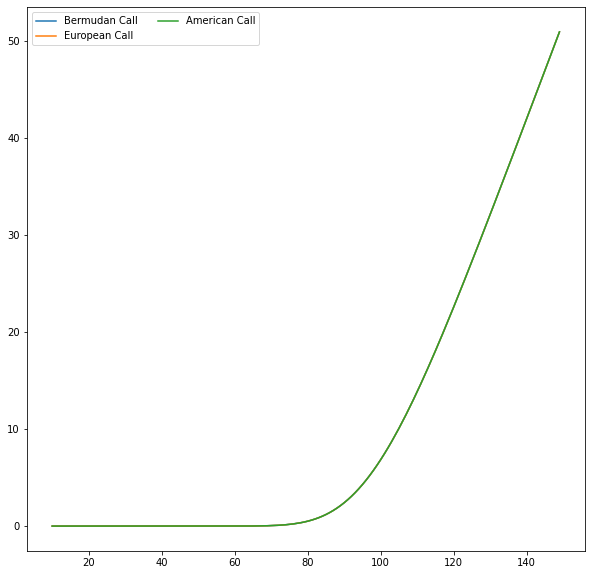

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(s0, Bermudan_prices,  label='Bermudan Call')
ax.plot(s0, European_prices,  label='European Call')
ax.plot(s0, American_prices,  label='American Call')
ax.legend(loc='upper left', ncol=2)

In [ ]:
Option_Types='Put'

Strike=100
r=0.02 # r-f rate
T=1 # maturity
Vol=0.15
s0=[i for i in range(10,150)]
stock_price_list=list(range(1,300))
time_list=list(np.arange(0,1,0.01))
early_excercise_date=[0.2,0.3,0.4,0.5]

# df=BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,Exotics,stock_price_list,time_list,early_excercise_date,s0)
tic = time.perf_counter()
Bermudan_prices=[BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,'Bermudan',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
European_prices=[BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,'European',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
American_prices=[BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,'American',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
toc = time.perf_counter()

print(f"Time to Perform Implicit Method {toc - tic:0.4f} seconds")

Time to Perform Implicit Method 1151.3184 seconds


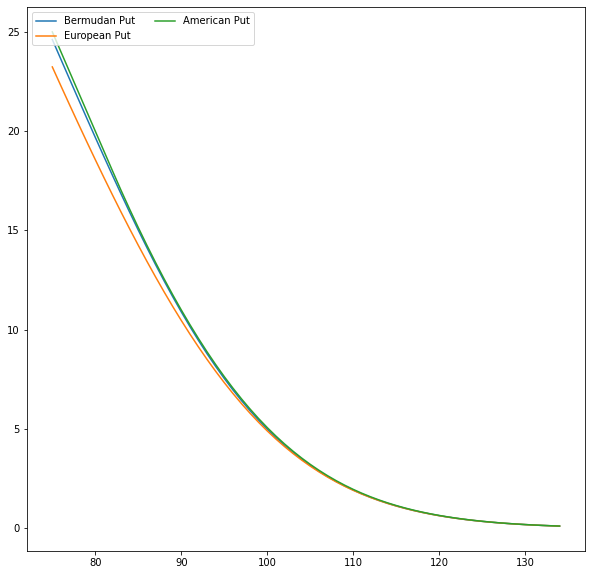

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(s0[65:125], Bermudan_prices[65:125],  label='Bermudan Put')
ax.plot(s0[65:125], European_prices[65:125],  label='European Put')
ax.plot(s0[65:125], American_prices[65:125],  label='American Put')
ax.legend(loc='upper left', ncol=2)

In [ ]:
Option_Types='Call'

Strike=100
r=0.02 # r-f rate
T=1 # maturity
Vol=0.15
s0=[i for i in range(10,150)]
stock_price_list=list(range(1,300))
time_list=list(np.arange(0,1,0.01))
early_excercise_date=[0.2,0.3,0.4,0.5]

# df=BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,Exotics,stock_price_list,time_list,early_excercise_date,s0)
tic = time.perf_counter()
Bermudan_prices=[BSM_Pricing_Crank_Nicolson_Method(Strike,r,T,Vol,Option_Types,'Bermudan',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
European_prices=[BSM_Pricing_Crank_Nicolson_Method(Strike,r,T,Vol,Option_Types,'European',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
American_prices=[BSM_Pricing_Crank_Nicolson_Method(Strike,r,T,Vol,Option_Types,'American',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
toc = time.perf_counter()

print(f"Time to Perform Crank-Nicolson Method {toc - tic:0.4f} seconds")

Time to Perform Crank-Nicolson Method 1038.1355 seconds


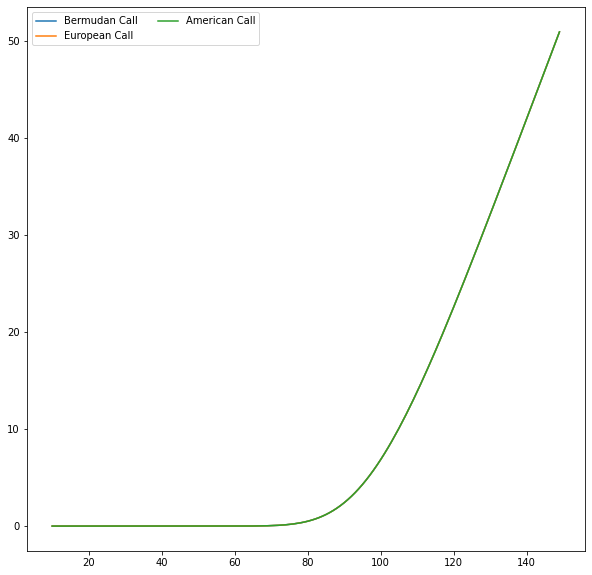

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(s0, Bermudan_prices,  label='Bermudan Call')
ax.plot(s0, European_prices,  label='European Call')
ax.plot(s0, American_prices,  label='American Call')
ax.legend(loc='upper left', ncol=2)

In [ ]:
Option_Types='Put'

Strike=100
r=0.02 # r-f rate
T=1 # maturity
Vol=0.15
s0=[i for i in range(10,150)]
stock_price_list=list(range(1,300))
time_list=list(np.arange(0,1,0.01))
early_excercise_date=[0.2,0.3,0.4,0.5]

# df=BSM_Pricing_Implicit_Method(Strike,r,T,Vol,Option_Types,Exotics,stock_price_list,time_list,early_excercise_date,s0)
tic = time.perf_counter()
Bermudan_prices=[BSM_Pricing_Crank_Nicolson_Method(Strike,r,T,Vol,Option_Types,'Bermudan',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
European_prices=[BSM_Pricing_Crank_Nicolson_Method(Strike,r,T,Vol,Option_Types,'European',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
American_prices=[BSM_Pricing_Crank_Nicolson_Method(Strike,r,T,Vol,Option_Types,'American',stock_price_list,time_list,early_excercise_date,S_0) for S_0 in s0]
toc = time.perf_counter()

print(f"Time to Perform Crank-Nicolson Method {toc - tic:0.4f} seconds")

Time to Perform Crank-Nicolson Method 989.3023 seconds


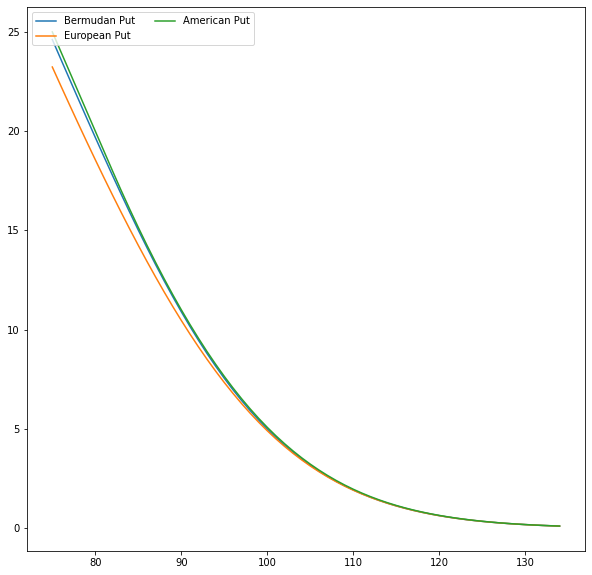

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(s0[65:125], Bermudan_prices[65:125],  label='Bermudan Put')
ax.plot(s0[65:125], European_prices[65:125],  label='European Put')
ax.plot(s0[65:125], American_prices[65:125],  label='American Put')
ax.legend(loc='upper left', ncol=2)

### **Result and Observations**

By examine the options value at T=0 across different strike prices, as expected, Call value for across three types of options coincides. This phenomenon can be explained in various angles. The most straight forward way is by exmine the european option put-call parity on non-dividend paying underlying:

> $ C=S-K*e^{-rt}+P$

Add then subtract $K$ to the $RHS$ and re-arrange the terms we get

> $ C=(S-K)+(K-K*e^{-rt})+P$

Put call parity holds true at any time during the contract period. We can easily see that the second and the third term of $RHS$ is always positive as K must be greater than its present value, and put price is strictly positive. This force the instrinct value of a european call is always greater than the immediate excercise pay-off $S-K$. The early excercise feature of any American option mandates that its value has to be at least the same as any European option. Thus an Ameican Call's intrinsic value also has to be larger than immediate excercise pay-off. So it is never optimal to excercise an American call option early. This can be extended to Bermudan call option as it is also about early excercise. 


While on the put side, it might be optimal to excercise a put option early. We observe that both Ameican Put and Bermudan put has higher value than an European put. This is as expected since they both gives more opportunity for the owner to earn excess return. We observed that the Bermudan put has a slightly lower value than American put since it can only be excercised early on a fixed set of date. In other words, it gives owner less opportunity to cash out early than the American put does.

Comments on the time to excute the the Implicit and Crank-Nicolson Methods: We didn't observe significant performance improvement by using the Crank-Nicolson Method. However this might due to the way we implement both methods in the python language.

### **The Explicit Method**

In the following section we shows the implementation of the explicit finit difference method in Matlab language. 